# Proof of concept

In [27]:
import os
import numpy 
import isambard_dev
import pandas
import seaborn
import MDAnalysis as mda
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib notebook

In [7]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'

# Tests

## Comparison $R_g$ calculation

`isambard` implementation

In [102]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'
model_pdb = path0 +model_dir+'/'+model_name+'/'+model_name+'.pdb'

In [103]:
model_pdb

'/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/cWza-K375C/conformation0/refined1_0001_INPUT_0900_ignorechain/refined1_0001_INPUT_0900_ignorechain.pdb'

In [104]:
p = isambard_dev.ampal.convert_pdb_to_ampal(model_pdb)
p.radius_of_gyration

20.756510056854026

`MDAnalysis` implementation

In [105]:
u = mda.Universe(model_pdb)
protein = u.select_atoms("protein")
protein.radius_of_gyration()

21.287107569558717

<b><span style="color:red"> NOTE </span></b>

* `isambard` does not have a way to compute the components of $R_g$

# Radius of gyration  components

Proof of concept

In [85]:
u = mda.Universe(model_pdb)
protein = u.select_atoms("protein")
protein_mass = numpy.sum(protein.masses)
protein_inertia = protein.moment_of_inertia() # tensor of inertia

Reference: Moment of Inertia

https://en.wikipedia.org/wiki/Moment_of_inertia#Inertia_tensor

https://www.mdanalysis.org/MDAnalysisTutorial/atomgroups.html

In [90]:
protein_Rg_n = [numpy.sqrt(protein_inertia[i][i]/float(protein_mass)) for i in range(3)]

In [106]:
protein_Rg_n

[16.746957886916277, 16.741931903855424, 18.58841077167299]

Implementation

In [109]:
import MDAnalysis as mda

def get_Rg_components(model_pdb):
    u = mda.Universe(model_pdb)
    protein = u.select_atoms("protein")
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    f = lambda x : numpy.sqrt(x/float(protein_mass))
    protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
    Rg_x, Rg_y, Rg_z = protein_Rg_n
    return Rg_x, Rg_y, Rg_z

In [110]:
get_Rg_components(model_pdb)

(16.746957886916277, 16.741931903855424, 18.58841077167299)

# Docked structures

## Conformational Groups: All models

### Scatter dataplots

<IPython.core.display.Javascript object>


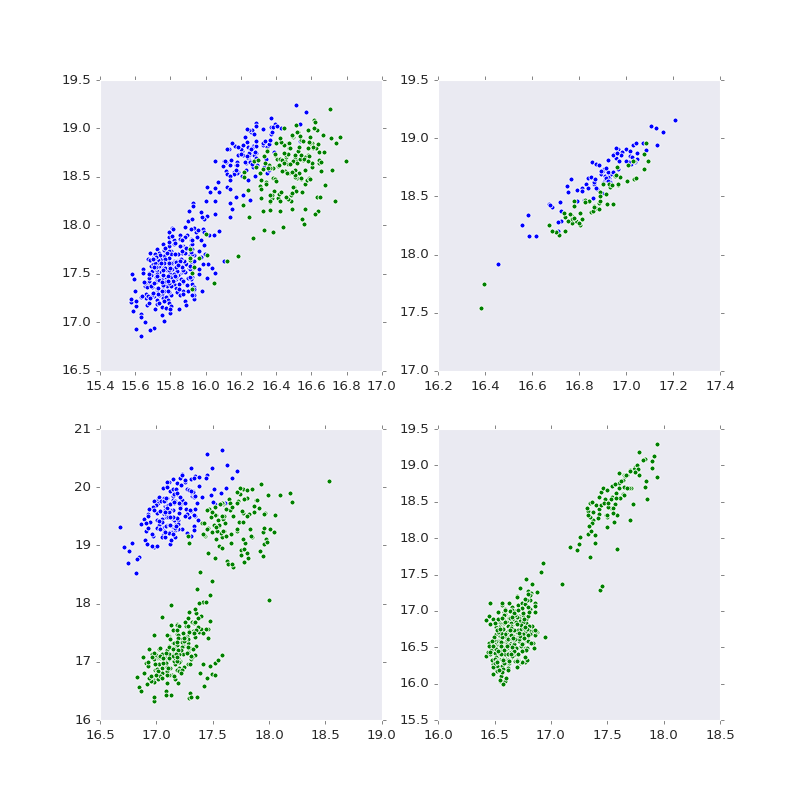

In [121]:
MUTANTS = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('white')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

COLORS = {
    'conformation0':'blue',
    'conformation1':'green'
}

for i in range(len(MUTANTS)):
    mutant = MUTANTS[i]
    for C in CONFORMATIONS[mutant]:
        X = []
        Z = []
        mutant_dir = mutant+'/'+C 
        for model_dir in [mutant_dir+'/'+model for model in os.listdir(wd+mutant_dir)]:
            model_name = model_dir.split('/')[-1]
            model_pdb = wd+'/'+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
        seaborn.scatterplot(X,Z,color=COLORS[C],ax=axes[mutant])

plt.show()

### Density dataplots

<IPython.core.display.Javascript object>


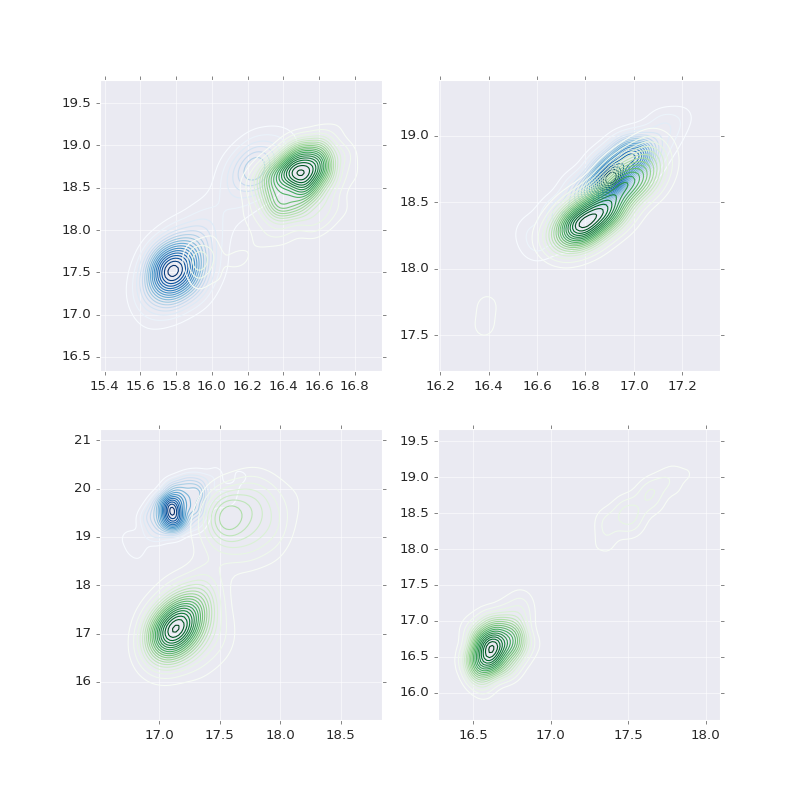

In [123]:
MUTANTS = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

for i in range(len(MUTANTS)):
    mutant = MUTANTS[i]
    for C in CONFORMATIONS[mutant]:
        X = []
        Z = []
        mutant_dir = mutant+'/'+C 
        for model_dir in [mutant_dir+'/'+model for model in os.listdir(wd+mutant_dir)]:
            model_name = model_dir.split('/')[-1]
            model_pdb = wd+'/'+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
        seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

## Conformational Groups: Sample models

In [138]:
import json

with open(wd+'EMMD_Sample.json','r') as fp:
    Sample = json.load(fp)

<IPython.core.display.Javascript object>


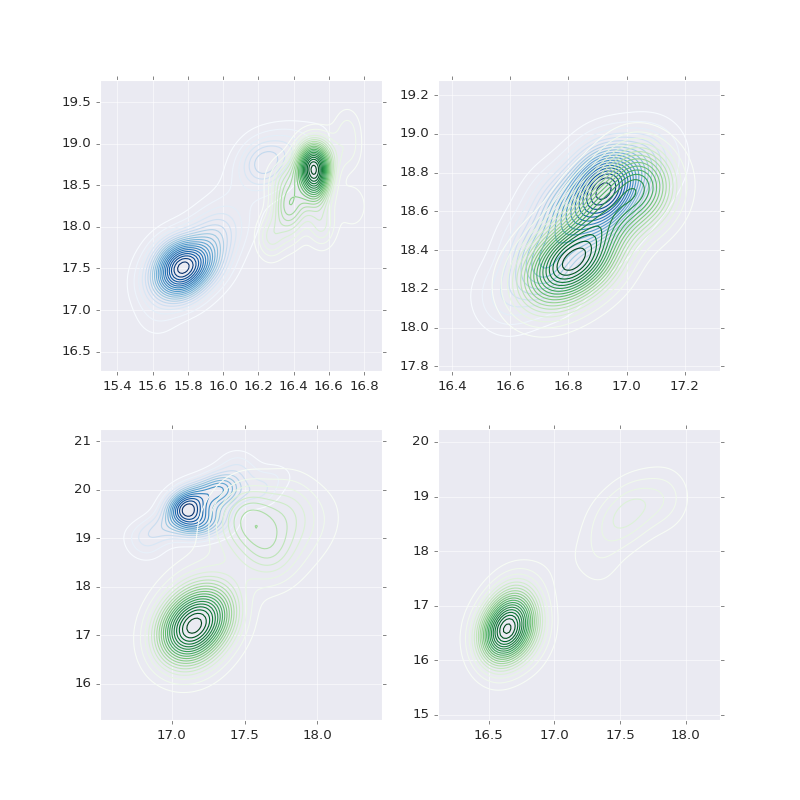

In [143]:
MyTags  = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
]

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

for tag in MyTags:
    mutant, C = tag
    X = []; Z = []
    for i in range(len(Sample)):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            model_pdb = wd+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
    seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

### Scatter dataplots

### Density plots

# MD trajectories for docked structures

## Proof of concept

In [157]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'

name = "md_100ns"
tpr_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'+ name + ".tpr"
xtc_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'+ name + ".xtc"

In [175]:
if all(map(os.path.isfile, [tpr_path,xtc_path])):
    u = mda.Universe(tpr_path, xtc_path, in_memory=True)
    print("Trajectory loaded and ready to analyse!")
else:
    print("MD traj not available")

In [176]:
u.trajectory.dt # Time-step (ps)

100.0

In [177]:
u.trajectory.n_frames

1001

In [178]:
protein = u.select_atoms("protein", updating=True)

In [189]:
data = []
for ts in u.trajectory[:10]:
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    f = lambda x : numpy.sqrt(x/float(protein_mass))
    protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
    Rg_x, Rg_y, Rg_z = protein_Rg_n
    data.append([Rg_x, Rg_z])
    print(Rg_x, Rg_y, Rg_z)

16.4595821378 16.4605024956 18.1709060345
16.9422313064 16.6475790211 18.288166401
16.766347706 16.8986037313 18.2364688001
16.835342559 16.8272165194 18.143982764
16.8581395345 17.011129365 18.3289446778
16.7533660782 17.0222951492 18.2117204888
16.8099722584 17.0028564264 18.2280406926
16.8121919358 17.1027280744 18.1971023711
16.7319331635 17.0027182641 18.1752052504
16.9330837476 16.9552870868 18.2636988201


In [190]:
df = pandas.DataFrame(data)

<IPython.core.display.Javascript object>


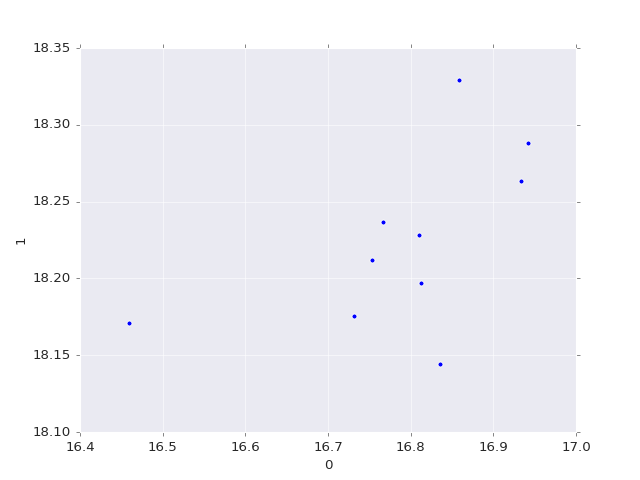

In [191]:
seaborn.scatterplot(df[0],df[1])

## Implementation

In [213]:
import os
import MDAnalysis as mda

def is_traj_available(dir_path, md_name):
    """Check whether all trajectory files are available
    This indicates whether simulations has finished successfully too"""
    gro_path = dir_path + name + ".gro"
    tpr_path = dir_path + name + ".tpr"
    xtc_path = dir_path + name + ".xtc"
    test_files = [gro_path, tpr_path, xtc_path]
    if all(map(os.path.isfile, test_files)):
        return True

def get_Rg_components_traj(dir_path, md_name):
    if is_traj_available(dir_path, md_name):
        tpr_path = dir_path + name + ".tpr"
        xtc_path = dir_path + name + ".xtc"
        u = mda.Universe(tpr_path, xtc_path, in_memory=True)
        n_frames = u.trajectory.n_frames
        dt = u.trajectory.dt
        mssg = "Loaded "+str(n_frames)+" frames with timestep "+str(dt)
        print(mssg)
    else:
        print("MD traj files (.tpr/.xtc) not available")
    try:
        protein = u.select_atoms("protein", updating=True)
        data = []
        for ts in u.trajectory:
            protein_mass = numpy.sum(protein.masses)
            protein_inertia = protein.moment_of_inertia() # tensor of inertia
            protein_mass = numpy.sum(protein.masses)
            protein_inertia = protein.moment_of_inertia() # tensor of inertia
            f = lambda x : numpy.sqrt(x/float(protein_mass))
            protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
            Rg_x, Rg_y, Rg_z = protein_Rg_n
            data.append([Rg_x, Rg_y, Rg_z])
        return data
    except:
        pass

In [206]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'

name = "md_100ns"
dir_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'

In [207]:
Rg_traj = get_Rg_components_traj(dir_path, name)

Loaded 1001 frames with timestep 100.0


In [209]:
Rg_traj = numpy.array(Rg_traj)

<IPython.core.display.Javascript object>


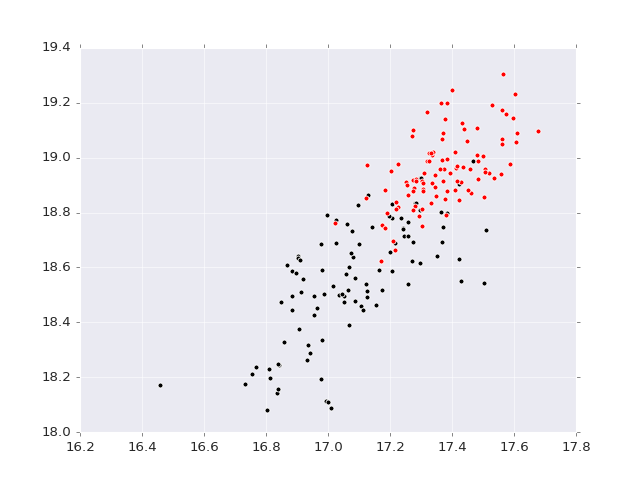

In [212]:
fig,ax = plt.subplots(1,1)
Rg_x, Rg_y, Rg_z = Rg_traj.T

seaborn.scatterplot(Rg_x[:100], Rg_z[:100],color='black',ax=ax)
seaborn.scatterplot(Rg_x[-100:], Rg_z[-100:],color='red',ax=ax)

plt.show()

## Sample completeness

In [214]:
import json

with open(wd+'EMMD_Sample.json','r') as fp:
    Sample = json.load(fp)

In [225]:
md_name = 'md_100ns'
for i in range(len(Sample)):
    model_dir = Sample[i]
    dir_path = wd+model_dir+'/complex/mdf/'
    print(model_dir, is_traj_available(dir_path, md_name))

cWza/conformation0/refined1_0001_INPUT_0736_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0881_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0508_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0373_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0444_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0045_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0791_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0909_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0473_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0881_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0168_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0003_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0753_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0923_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0175_ignorechain True
cWza/conformation0/refined1_0001_INPUT_0851_ignorechain True
cWza/conformation0/refin

## First 10 ns

In [ ]:
MyTags  = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
]

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

name = 'md_100ns'
for tag in MyTags:
    data = []
    mutant, C = tag
    for i in range(1):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            dir_path = wd+model_dir+'/complex/mdf/'
            Rg_traj = get_Rg_components_traj(dir_path, name)
            data = data + Rg_traj[:100]
        data = numpy.array(data)

    Rg_x, Rg_y, Rg_z = data.T
    try:
        seaborn.scatterplot(Rg_x, Rg_z,color='black',ax=ax)
        seaborn.scatterplot(Rg_x, Rg_z,color='red',ax=ax)
    except:
        pass
    
#     seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

<IPython.core.display.Javascript object>

Loaded 1001 frames with timestep 100.0


## Last 10 ns